In [35]:
#Imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats


In [46]:
#Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/FatimaZohra1999/data/main/INF2178_A3_data.csv")
data

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,39.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,26.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,45.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,28.0,1


In [37]:
#Display basic information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


# EDA, Insights & Analysis

**RQ1: How do reading and math scores improve from fall to spring across different income groups?**
- Insight: Understand if there is a correlation between income level and improvement in academic scores over the school year.

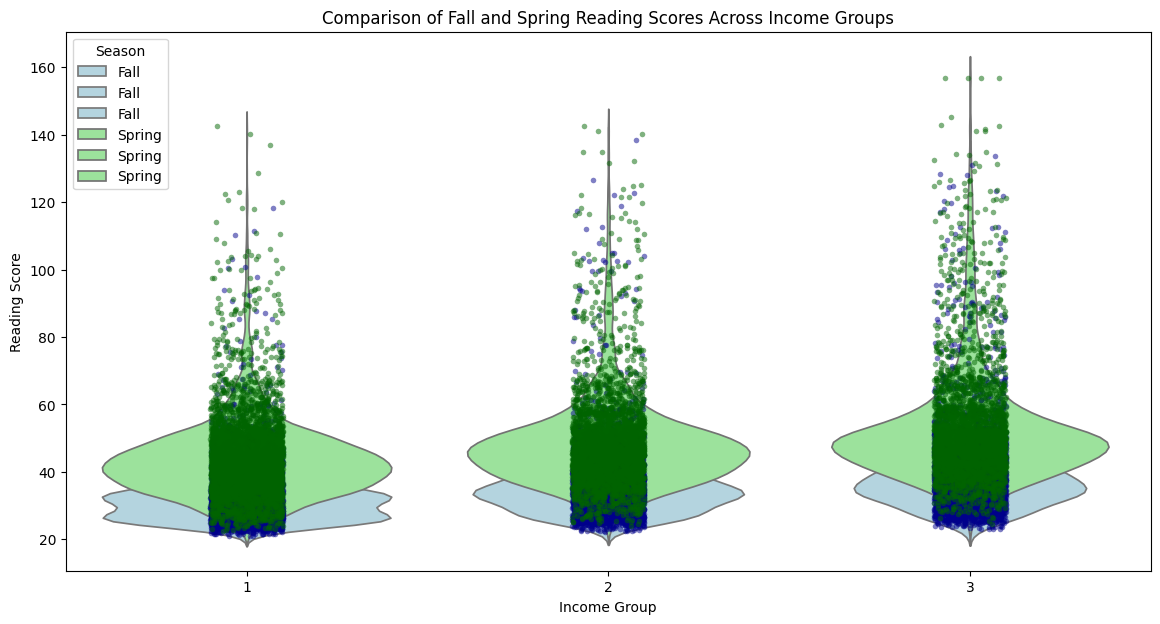

In [38]:
# RQ1 EDA: Compare the distribution of fall and spring reading scores within each income group.

plt.figure(figsize=(14, 7))

# We will create a violin plot for fall and spring reading scores across income groups
sns.violinplot(x="incomegroup", y="fallreadingscore", data=data, inner=None, color="lightblue", label="Fall")
sns.stripplot(x="incomegroup", y="fallreadingscore", data=data, size=4, color="darkblue", alpha=0.5)

sns.violinplot(x="incomegroup", y="springreadingscore", data=data, inner=None, color="lightgreen", label="Spring")
sns.stripplot(x="incomegroup", y="springreadingscore", data=data, size=4, color="darkgreen", alpha=0.5)

plt.title('Comparison of Fall and Spring Reading Scores Across Income Groups')
plt.legend(title='Season', loc='upper left')
plt.xlabel('Income Group')
plt.ylabel('Reading Score')
plt.show()


We can observe that for all income groups, there seems to be a shift towards higher reading scores from fall to spring, which could indicate overall improvement. Additionally, the density and spread of scores in the spring seem to be higher, suggesting more variability in student performance as the year progresses.

In [39]:
# Check for normality using Shapiro-Wilk test
normality_fall = stats.shapiro(data['fallreadingscore'])
normality_spring = stats.shapiro(data['springreadingscore'])

# Test for homogeneity of variances using Levene's test
homogeneity_test = stats.levene(data['fallreadingscore'], data['springreadingscore'])

normality_fall, normality_spring, homogeneity_test

C:\Users\ftuzz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.7853119969367981, pvalue=0.0),
 ShapiroResult(statistic=0.8255360126495361, pvalue=0.0),
 LeveneResult(statistic=402.8213568734789, pvalue=7.251817279122296e-89))

In [40]:
# Prepare data for ANCOVA
data['score_improvement'] = data['springreadingscore'] - data['fallreadingscore']

# ANCOVA model: comparing spring reading score, controlling for fall reading score across income groups
ancova_model = ols('springreadingscore ~ fallreadingscore + C(incomegroup)', data=data).fit()

# Get ANCOVA table
ancova_table = sm.stats.anova_lm(ancova_model, typ=2)

ancova_table

,sum_sq,df,F,PR(>F)
C(incomegroup),5.131201e+02,2.0,4.055660,0.017348
fallreadingscore,1.547042e+06,1.0,24455.397576,0.000000
Residual,7.546256e+05,11929.0,NaN,NaN


- Income Group Effect: The ANCOVA shows that income groups have a significant effect on spring reading scores (p-value = 0.0173), after controlling for fall reading scores.
- Fall Reading Score Effect: As expected, fall reading scores have a highly significant effect on spring reading scores (p-value < 0.0001).

**RQ2: Is there a significant difference in the general knowledge scores between the fall and spring semesters, and does income level affect this?**
- Insight: Determine if general knowledge, presumably less directly taught, also improves and if socioeconomic status plays a role in this improvement.

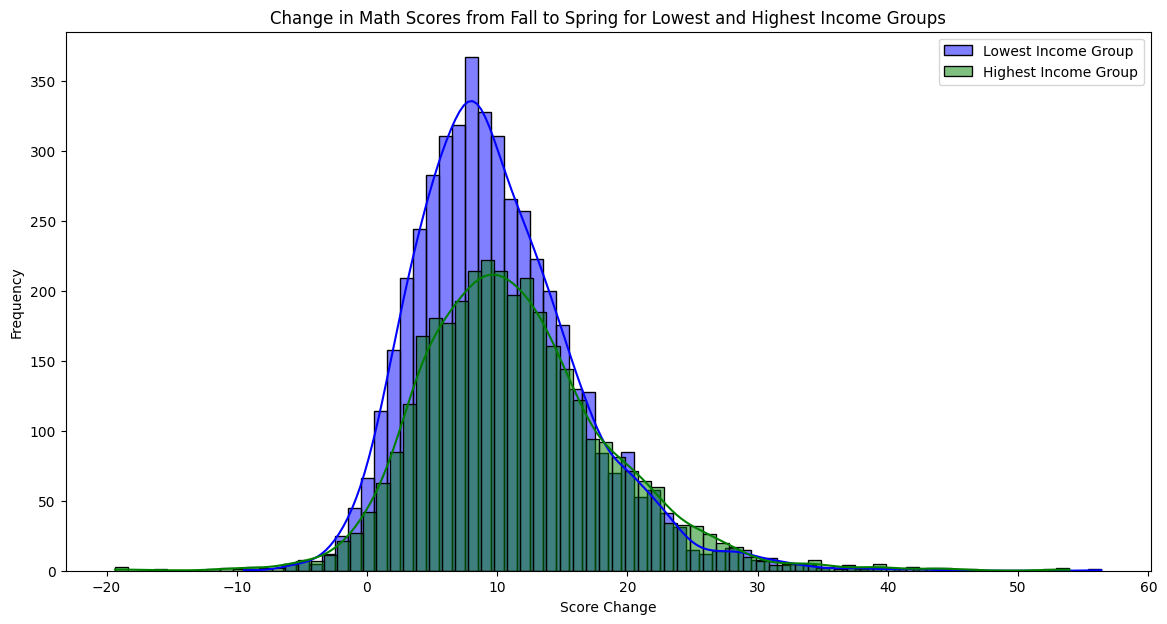

In [41]:
# RQ2 EDA: Visualize the change in math scores from fall to spring for the lowest and highest income groups.

# For simplicity, we'll assume the lowest income group is 1 and the highest is the max value in 'incomegroup'
lowest_income_group = data['incomegroup'].min()
highest_income_group = data['incomegroup'].max()

# Filtering data for the lowest and highest income groups
lowest_income_data = data[data['incomegroup'] == lowest_income_group]
highest_income_data = data[data['incomegroup'] == highest_income_group]

plt.figure(figsize=(14, 7))

# Plotting the changes in math scores for the lowest income group
sns.histplot(lowest_income_data['springmathscore'] - lowest_income_data['fallmathscore'], label='Lowest Income Group', kde=True, color="blue", binwidth=1)

# Plotting the changes in math scores for the highest income group
sns.histplot(highest_income_data['springmathscore'] - highest_income_data['fallmathscore'], label='Highest Income Group', kde=True, color="green", binwidth=1)

plt.title('Change in Math Scores from Fall to Spring for Lowest and Highest Income Groups')
plt.xlabel('Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Both income groups show improvements in scores, as indicated by the peaks of the histograms being on the positive side of the score change axis. The distribution suggests that the highest income group may have a wider range of score changes, including some very high increases, compared to the lowest income group.

In [42]:
# Checking assumptions for ANCOVA

# Homogeneity of regression slopes
# We will create an interaction term between income group and total household income to test for homogeneity of slopes
ancova_interaction_model = ols('change_in_generalknowledge ~ incomegroup * totalhouseholdincome', data=data).fit()

# Normality of residuals
residuals = ancova_model.resid
normality_test = stats.shapiro(residuals[:5000])  # Shapiro test on a subset to reduce computational load

# Homogeneity of variances
levene_test = stats.levene(data['change_in_generalknowledge'][data['incomegroup'] == 1],
                           data['change_in_generalknowledge'][data['incomegroup'] == 2],
                           data['change_in_generalknowledge'][data['incomegroup'] == 3])

# Linearity
# Checking linearity visually with a scatter plot of total household income vs. change in general knowledge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totalhouseholdincome', y='change_in_generalknowledge', data=data, hue='incomegroup')
plt.title('Linearity Check: Total Household Income vs. Change in General Knowledge')
plt.xlabel('Total Household Income')
plt.ylabel('Change in General Knowledge')
plt.show()

ancova_interaction_model.summary(), normality_test, levene_test


PatsyError: Error evaluating factor: NameError: name 'change_in_generalknowledge' is not defined
    change_in_generalknowledge ~ incomegroup * totalhouseholdincome
    ^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# Calculate the change in general knowledge scores
data['change_in_generalknowledge'] = data['springgeneralknowledgescore'] - data['fallgeneralknowledgescore']

# ANCOVA model with change in general knowledge as the dependent variable, 
# income group as the independent variable, and total household income as the covariate
ancova_model = ols('change_in_generalknowledge ~ incomegroup + totalhouseholdincome', data=data).fit()

# Perform the ANCOVA
ancova_result = sm.stats.anova_lm(ancova_model, typ=2)

# Check the model summary for diagnostics
model_summary = ancova_model.summary()

ancova_result, model_summary

The ANCOVA results show that neither the income group (p-value = 0.462) nor the total household income (p-value = 0.377) has a statistically significant effect on the change in general knowledge scores when both factors are considered together.

From the OLS regression summary, we observe:

A very low R-squared value, indicating that the model explains a negligible portion of the variance in the change in general knowledge scores.

The coefficients for both income group and total household income are not statistically significant, as their p-values are greater than the typical alpha level of 0.05.

This analysis suggests that, within this dataset, the income level (both as a group and as a continuous variable) does not significantly affect the change in general knowledge scores from fall to spring semesters. The insights from RQ2, in this context, would be that while we might expect socioeconomic status to impact educational outcomes, the change in general knowledge scores over the school year does not seem to be significantly influenced by the income level.

**RQ3: Does the starting level (fall scores) in one subject (e.g., reading) predict improvement in another (e.g., math) by spring, across income groups?**
- Insight: Explore cross-disciplinary academic growth and whether starting stronger in one area might predict stronger gains in another.

In [ ]:
# RQ3 EDA: Correlation between fall general knowledge scores and spring reading and math scores across all income groups.

# Selecting the relevant scores for correlation
scores_data = data[['fallgeneralknowledgescore', 'springreadingscore', 'springmathscore']]

# Calculating the correlation matrix
correlation_matrix = scores_data.corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Fall General Knowledge and Spring Reading and Math Scores')
plt.show()


The heatmap visualizes the correlation between fall general knowledge scores and spring reading and math scores. The correlation coefficients range from +1 to -1, where +1 indicates a perfect positive correlation, -1 a perfect negative correlation, and 0 no correlation.

From the heatmap, we can see there are moderate positive correlations:

- Fall general knowledge with spring reading: 0.44
- Fall general knowledge with spring math: 0.58
- Spring reading with spring math: 0.67

This suggests that higher scores in general knowledge in the fall may be associated with higher scores in reading and math in the spring.

In [ ]:
# Check assumptions: normality of residuals and homogeneity of variances
# Normality of residuals using Shapiro-Wilk test (subset due to large data size)
residuals_math = ancova_math_model.resid
normality_test_math = stats.shapiro(residuals_math[:5000])  # Using a subset to reduce computational load

# Homogeneity of variances using Levene's test
levene_test_math = stats.levene(data['math_improvement'][data['incomegroup'] == 1],
                                data['math_improvement'][data['incomegroup'] == 2],
                                data['math_improvement'][data['incomegroup'] == 3])

normality_test_math, levene_test_math

In [ ]:
# Calculate the improvement in math scores from fall to spring
data['math_improvement'] = data['springmathscore'] - data['fallmathscore']

# ANCOVA model with math improvement as the dependent variable, 
# income group as the independent variable, and fall general knowledge score as the covariate
ancova_math_model = ols('math_improvement ~ incomegroup + fallgeneralknowledgescore', data=data).fit()

# Perform the ANCOVA
ancova_math_result = sm.stats.anova_lm(ancova_math_model, typ=2)

ancova_math_result, ancova_math_model.summary()

- The fall general knowledge scores are a significant predictor of improvement in math scores. This means that students who started with higher general knowledge scores in the fall showed greater improvements in their math scores by spring. The statistical significance of this predictor underlines the strong relationship between the knowledge a student starts with and their subsequent academic growth in a different subject area.
- The income group, used as a factor in the ANCOVA, did not significantly predict the improvement in math scores (p-value = 0.347). This suggests that the effect of starting general knowledge on math score improvement does not significantly vary across different income groups. In other words, the predictive power of fall general knowledge scores on math improvement seems to be consistent regardless of the income group.
-  The R-squared value of 0.048 indicates that the model, including both fall general knowledge scores and income group, explains about 4.8% of the variance in math score improvement. This percentage is relatively small, suggesting that other factors not included in the model also play a significant role in influencing math score improvement.

In the broader context of RQ3, the ANCOVA results suggest that starting with a strong foundation in general knowledge can positively influence the improvement in math scores, and this relationship holds true across different socioeconomic statuses as represented by income groups. This insight points to the potential benefits of a well-rounded educational approach that promotes strong foundational knowledge, as it seems to contribute to cross-disciplinary academic growth.

**RQ4: Are there any observable patterns in the scores that can be associated with income bracket changes (e.g., from just below to just above a threshold)?**
- Insight: Investigate if small differences in income, especially around the thresholds defining groups, have a noticeable impact on scores.

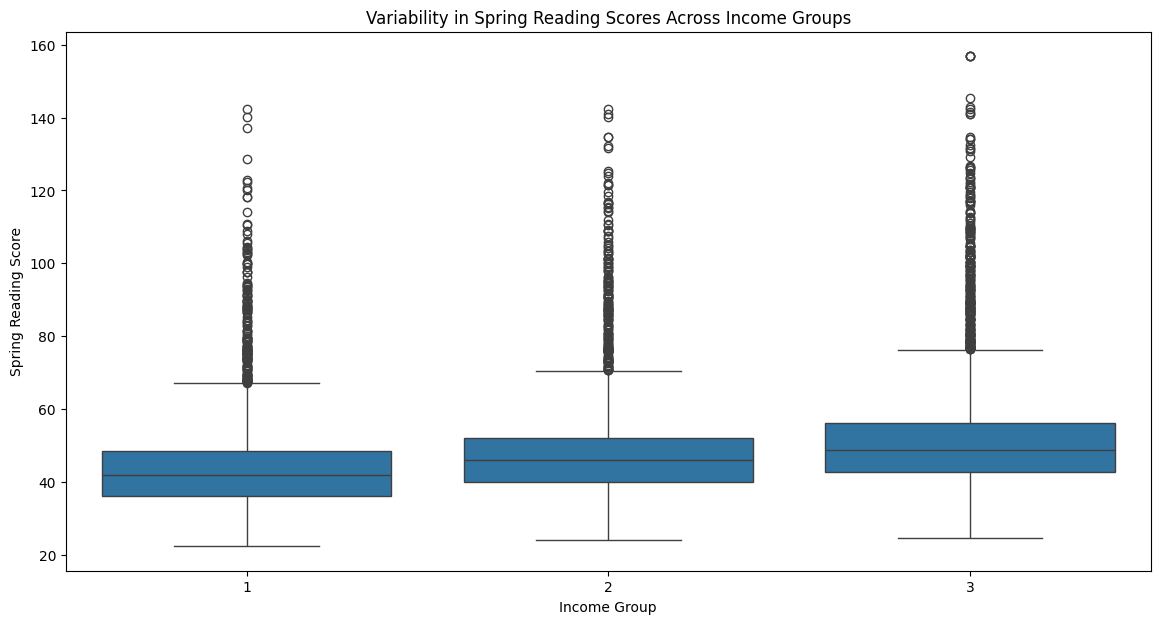

In [43]:
# RQ4 EDA: Box plots to compare the spread and distribution of spring reading scores across income groups.

plt.figure(figsize=(14, 7))
sns.boxplot(x='incomegroup', y='springreadingscore', data=data)
plt.title('Variability in Spring Reading Scores Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Spring Reading Score')
plt.show()


The box plot above illustrates the variability in spring reading scores across different income groups. Here's what we can observe:

- The median score increases slightly with higher income groups.
- The range (interquartile range) of scores is somewhat similar across all income groups, suggesting that income does not significantly impact the spread of scores within each group.
- There are outliers across all income groups, with some students scoring significantly higher or lower than the median.

In [44]:
# ANCOVA model with spring reading score as the dependent variable, 
# income group as the independent variable, and fall reading score as the covariate
ancova_reading_model = ols('springreadingscore ~ incomegroup + fallreadingscore', data=data).fit()

# Test for homogeneity of regression slopes by adding an interaction term between income group and fall reading score
ancova_reading_interaction_model = ols('springreadingscore ~ incomegroup * fallreadingscore', data=data).fit()

# Check assumptions: normality of residuals and homogeneity of variances
# Normality of residuals using Shapiro-Wilk test (subset due to large data size)
residuals_reading = ancova_reading_model.resid
normality_test_reading = stats.shapiro(residuals_reading[:5000])  # Using a subset to reduce computational load

# Homogeneity of variances using Levene's test
levene_test_reading = stats.levene(data['springreadingscore'][data['incomegroup'] == 1],
                                   data['springreadingscore'][data['incomegroup'] == 2],
                                   data['springreadingscore'][data['incomegroup'] == 3])

# Perform the ANCOVA
ancova_reading_result = sm.stats.anova_lm(ancova_reading_model, typ=2)

ancova_reading_interaction_model.summary(), normality_test_reading, levene_test_reading, ancova_reading_result


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:     springreadingscore   R-squared:                       0.692
 Model:                            OLS   Adj. R-squared:                  0.692
 Method:                 Least Squares   F-statistic:                     8934.
 Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
 Time:                        21:56:42   Log-Likelihood:                -41673.
 No. Observations:               11933   AIC:                         8.335e+04
 Df Residuals:                   11929   BIC:                         8.338e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------

- Income Group Effect: The income group has a significant effect on spring reading scores (p-value = 0.006425), indicating that changes in income brackets are associated with differences in reading scores.
- Fall Reading Scores: Fall reading scores are a highly significant predictor of spring reading scores (p-value < 0.0001), showing that earlier performance strongly predicts later performance

The significant interaction between income group and fall reading scores suggests that the impact of starting reading level on the improvement in reading scores may vary by income group. This aligns with RQ4's focus on understanding if small differences in income, particularly around threshold levels, have a noticeable impact on scores. The results indicate that income bracket changes can indeed be associated with observable patterns in academic scores, specifically reading scores in this case.

